In [2]:
import torch
from torch.autograd import Variable
import numpy as np
import pandas as pd
import torch.functional as F
import torch.nn.functional as F
import nltk
from nltk.tokenize import word_tokenize

In [5]:
import os
import chardet

basepath = 'bbc_fultext/bbc/'

# pbar = pyprind.ProgBar(50000)
df = pd.DataFrame()
for directory in ('sport', 'tech', 'entertainment', 'politics', 'business'):
    path = os.path.join(basepath, directory)
    for file in sorted(os.listdir(path)):
        
        rawdata = open(os.path.join(path, file) , "rb").read()
        result = chardet.detect(rawdata)
        charenc = result['encoding']
        
        with open(os.path.join(path, file), 
                  'r', encoding=charenc) as infile:
            # print(os.path.join(path, file))
            txt = infile.read()
        df = df.append([txt], 
                       ignore_index=True)
        
df.columns = ['news_article']

FileNotFoundError: [WinError 3] Системе не удается найти указанный путь: 'bbc_fultext/bbc\\sport'

In [15]:
import chardet    
basepath = 'bbc_fultext/bbc/'
filpath = 'sport/043.txt'
rawdata = open(os.path.join(basepath, filpath) , "rb").read()
result = chardet.detect(rawdata)
charenc = result['encoding']
print(charenc)

ISO-8859-1


In [17]:
df.to_csv('bbc_data.csv', index=False, encoding='utf-8')

In [18]:
import pandas as pd

df = pd.read_csv('bbc_data.csv', encoding='utf-8')
df.head(3)

news_article
0  Claxton hunting first major medal\n\nBritish h...
1  O'Sullivan could run in Worlds\n\nSonia O'Sull...
2  Greene sets sights on world title\n\nMaurice G...

In [22]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [23]:
tokenized_corpus = df['news_article'].apply(word_tokenize)
tokenized_corpus.head(3)

0    [Claxton, hunting, first, major, medal, Britis...
1    [O'Sullivan, could, run, in, Worlds, Sonia, O'...
2    [Greene, sets, sights, on, world, title, Mauri...
Name: news_article, dtype: object

In [24]:
tokenized_corpus.to_csv('bbc_data_tokenized.csv', index=False, encoding='utf-8')

/home/sultan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [7]:
import pandas as pd

df = pd.read_csv('bbc_data_tokenized.csv', encoding='utf-8')
df.columns = ['news_article']
df.head(3)

news_article
0  ["O'Sullivan", 'could', 'run', 'in', 'Worlds',...
1  ['Greene', 'sets', 'sights', 'on', 'world', 't...
2  ['IAAF', 'launches', 'fight', 'against', 'drug...

In [8]:
df.shape

(2224, 1)

In [30]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words("english")

[nltk_data] Downloading package punkt to /home/sultan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/sultan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/sultan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /home/sultan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
df[1:3]

news_article
1  O'Sullivan could run in Worlds\n\nSonia O'Sull...
2  Greene sets sights on world title\n\nMaurice G...

In [32]:
import pandas as pd

df = pd.read_csv('bbc_data.csv', encoding='utf-8')
df.head(3)

news_article
0  Claxton hunting first major medal\n\nBritish h...
1  O'Sullivan could run in Worlds\n\nSonia O'Sull...
2  Greene sets sights on world title\n\nMaurice G...

In [33]:
def is_noun(tag):
    return tag in ['NN', 'NNS', 'NNP', 'NNPS']

def is_verb(tag):
    return tag in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']

def is_adverb(tag):
    return tag in ['RB', 'RBR', 'RBS']

def is_adjective(tag):
    return tag in ['JJ', 'JJR', 'JJS']


def get_tag(tag):
    if is_adjective(tag):
        return wordnet.ADJ
    elif is_noun(tag):
        return wordnet.NOUN
    elif is_adverb(tag):
        return wordnet.ADV
    elif is_verb(tag):
        return wordnet.VERB
    return wordnet.NOUN

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

#Preparation of data  удаление функциональных слов

#For each records tokenize into individual words:
def tokenize_wrds(X):
    data = []
    for i in range(X.shape[0]):
        text = X[i][0] #Проходимся по каждой записи
        words = nltk.word_tokenize(text) #Токенизация в индивидуальные слова в каждой записи
        words = [word.lower() for word in words] #Перевести все буквы в нижний регистр
        words = [word for word in words if word not in sw] #Убираем стоп-слова (семантически нейтральные слова(такие как союзы, предлоги, артикли и пр.))
        tagged_words = nltk.pos_tag(words) #Присваиваем тэги частей речи каждому слову
        lemmatized_words = [lemmatizer.lemmatize(word, get_tag(tag)) for word, tag in tagged_words] #Лемматизация - переводим однокоренные в первоначальную форму
        data.append(lemmatized_words)
    return data

data = tokenize_wrds(df[1:15].values)
print(data)

[["o'sullivan", 'could', 'run', 'world', 'sonia', "o'sullivan", 'indicate', 'would', 'like', 'participate', 'next', 'month', "'s", 'world', 'cross', 'country', 'championship', 'st', 'etienne', '.', 'athletics', 'ireland', 'hint', '35-year-old', 'cobh', 'runner', 'may', 'include', 'official', 'line-up', 'event', 'france', '19-20', 'march', '.', 'provincial', 'team', 'select', 'last', 'saturday', "'s", 'national', 'santry', 'officially', 'announce', 'week', '.', "o'sullivan", 'present', 'prepare', 'london', 'marathon', '17', 'april', '.', 'participation', "o'sullivan", ',', 'currentily', 'train', 'base', 'australia', ',', 'would', 'boost', 'ireland', 'team', 'bronze', 'three', 'year', 'agio', '.', 'first', 'three', 'santry', 'last', 'saturday', ',', 'jolene', 'byrne', ',', 'maria', 'mccambridge', 'fionnualla', 'britton', ',', 'automatic', 'selection', 'likely', 'form', 'part', 'long-course', 'team', '.', "o'sullivan", 'also', 'take', 'part', 'bupa', 'great', 'ireland', 'run', '9', 'april

In [4]:
import re, string 
import pandas as pd   
from collections import defaultdict
import spacy
from sklearn.manifold import TSNE
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from gensim.models import Word2Vec
%matplotlib inline

df = pd.read_csv('bbc_data.csv')

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    # Remove a sentence if it is only one word long
    if len(text) > 2:
        return ' '.join(word for word in text.split() if word not in STOPWORDS)

df_clean = pd.DataFrame(df['news_article'].apply(lambda x: clean_text(x)))
df_clean.head()

news_article
0  claxton hunting first major medal british hurd...
1  osullivan could run worlds sonia osullivan ind...
2  greene sets sights world title maurice greene ...
3  iaaf launches fight drugs iaaf athletics world...
4  dibaba breaks world record ethiopias tirunesh ...

In [5]:
nlp = spacy.load('en', disable=['ner', 'parser']) # disabling Named Entity Recognition for speed

def lemmatizer(text):        
    sent = []
    doc = nlp(text)
    for word in doc:
        sent.append(word.lemma_)
    return " ".join(sent)

df_clean["text_lemmatize"] =  df_clean.apply(lambda x: lemmatizer(x['news_article']), axis=1)
df_clean['text_lemmatize_clean'] = df_clean['text_lemmatize'].str.replace('-PRON-', '')

In [3]:
df_clean

news_article  \
0     claxton hunting first major medal british hurd...   
1     osullivan could run worlds sonia osullivan ind...   
2     greene sets sights world title maurice greene ...   
3     iaaf launches fight drugs iaaf athletics world...   
4     dibaba breaks world record ethiopias tirunesh ...   
...                                                 ...   
2220  trial begins spains top banker trial emilio bo...   
2221  uk economy ends year spurt uk economy grew est...   
2222  healthsouth exboss goes trial former head us m...   
2223  euro firms miss optimism large companies aroun...   
2224  lacroix label bought us firm luxury goods grou...   

                                         text_lemmatize  \
0     claxton hunt first major medal british hurdler...   
1     osullivan could run world sonia osullivan indi...   
2     greene set sight world title maurice greene ai...   
3     iaaf launch fight drug iaaf athletic world gov...   
4     dibaba break world record ethiopia tirunesh di...   
...                                                 ...   
2220  trial begin spain top banker trial emilio boti...   
2221  uk economy end year spurt uk economy grow esti...   
2222  healthsouth exboss go trial former head -PRON-...   
2223  euro firm miss optimism large company around w...   
2224  lacroix label buy -PRON- firm luxury good grou...   

                                   text_lemmatize_clean  
0     claxton hunt first major medal british hurdler...  
1     osullivan could run world sonia osullivan indi...  
2     greene set sight world title maurice greene ai...  
3     iaaf launch fight drug iaaf athletic world gov...  
4     dibaba break world record ethiopia tirunesh di...  
...                                                 ...  
2220  trial begin spain top banker trial emilio boti...  
2221  uk economy end year spurt uk economy grow esti...  
2222  healthsouth exboss go trial former head  medic...  
2223  euro firm miss optimism large company around w...  
2224  lacroix label buy  firm luxury good group lvmh...  

[2225 rows x 3 columns]

In [6]:
sentences = [row.split() for row in df_clean['text_lemmatize_clean']]
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
        
sorted(word_freq, key=word_freq.get, reverse=True)[:10]

['say', 'mr', 'year', 'would', 'make', 'also', 'people', 'new', 'one', 'good']

In [19]:
word_freq

defaultdict(int,
            {'claxton': 14,
             'hunt': 123,
             'first': 1283,
             'major': 270,
             'medal': 71,
             'british': 533,
             'hurdler': 4,
             'sarah': 16,
             'confident': 99,
             'win': 903,
             'next': 780,
             'month': 831,
             'european': 534,
             'indoor': 106,
             'championship': 155,
             'madrid': 107,
             'already': 472,
             'smash': 22,
             'record': 573,
             'hurdle': 28,
             'twice': 68,
             'season': 276,
             'set': 811,
             'new': 1987,
             'mark': 275,
             'second': 637,
             'aaas': 18,
             'title': 328,
             'quite': 146,
             'say': 8824,
             'take': 1743,
             'race': 224,
             'come': 1206,
             'long': 340,
             'keep': 393,
             'train': 83,
      

In [7]:
import sys
w2v_model = Word2Vec(min_count=200,
                     window=5,
                     size=100,
                     workers=4)
                     
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_model.iter)
w2v_model.init_sims(replace=True)

/home/sultan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  


In [31]:
w2v_model.wv.most_similar(positive=['people'])

[('let', 0.9659422636032104),
 ('way', 0.9405339360237122),
 ('able', 0.9274482727050781),
 ('create', 0.9138696193695068),
 ('work', 0.909186840057373),
 ('content', 0.8976002931594849),
 ('mean', 0.8956043720245361),
 ('personal', 0.8952968120574951),
 ('want', 0.8937045335769653),
 ('different', 0.8895789980888367)]

In [23]:
w2v_model.wv.similarity('company', 'business')

0.8898635

In [14]:
import matplotlib.pyplot as plt

/home/sultan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


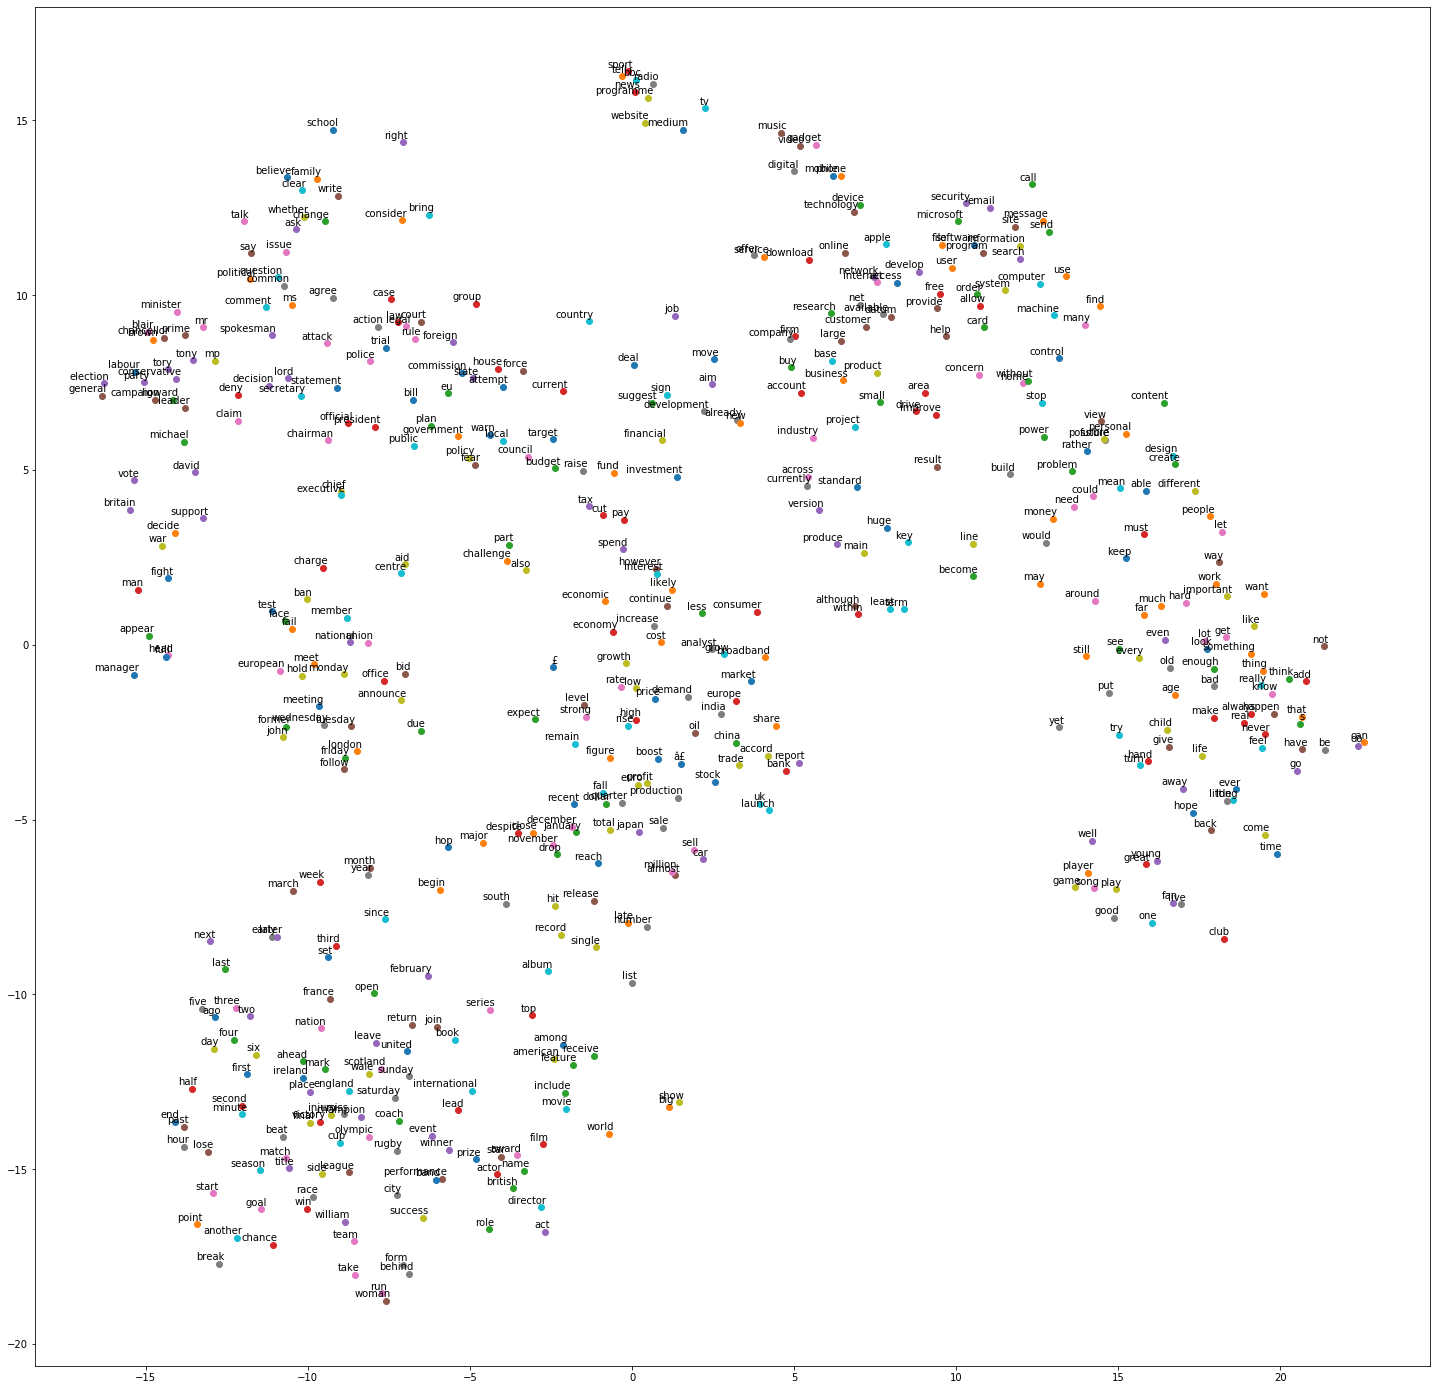

In [16]:
import sys
import re, string 
import pandas as pd 
from time import time  
from collections import defaultdict
import spacy
from sklearn.manifold import TSNE
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from gensim.models import Word2Vec
%matplotlib inline

def tsne_plot(model):
    "Create TSNE model and plot it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)
   
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    # print(x, y)        
    plt.figure(figsize=(25,25)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
    
tsne_plot(w2v_model)